In [2]:
import pandas as pd

In [3]:
property = pd.read_csv('../data/curated/places_property.csv')

In [4]:
property = property[['Suburb', 'num_schools', 'num_landmarks', 'distance to CBD',
       'total_transport']]

In [5]:
agg_func = {'num_landmarks': 'mean', 'distance to CBD': 'mean', 
            'num_schools': 'mean', 'total_transport':'mean'}
property = property.groupby('Suburb').agg(agg_func).reset_index()
property

,Suburb,num_landmarks,distance to CBD,num_schools,total_transport
0,ABBOTSFORD,0.188679,7.020755,33.452830,4.754717
1,ALBERT PARK,0.000000,13.869231,0.000000,5.461538
2,ALTONA,0.000000,23.355556,5.444444,0.666667
3,ALTONA MEADOWS,0.000000,34.836364,2.545455,0.181818
4,ARMADALE,0.000000,14.087500,33.916667,11.333333
...,...,...,...,...,...
119,WHITTLESEA,0.000000,37.150000,0.000000,0.000000
120,WILLIAMSTOWN,0.000000,17.656250,8.875000,0.500000
121,WOLLERT,0.000000,35.840741,0.407407,0.000000
122,WYNDHAM VALE,0.000000,50.394828,1.913793,0.000000


In [6]:
import math

def round_custom(x):
    decimal_part = x - math.floor(x)
    if decimal_part >= 0.5:
        return math.ceil(x)
    else:
        return math.floor(x)

# Apply the custom rounding function to the 'Price' column
property['num_landmarks'] = property['num_landmarks'].apply(round_custom)
property['distance to CBD'] = property['distance to CBD'].round(2)
property['num_schools'] = property['num_schools'].apply(round_custom)
property['total_transport'] = property['total_transport'].apply(round_custom)

In [7]:
property.sort_values(by='num_landmarks', ascending=False)

,Suburb,num_landmarks,distance to CBD,num_schools,total_transport
102,SOUTHBANK,16,9.40,17,4
38,EAST MELBOURNE,12,5.94,29,4
46,FITZROY,7,4.13,37,10
34,DOCKLANDS,6,8.79,8,4
87,NORTH MELBOURNE,6,4.87,30,6
...,...,...,...,...,...
37,DROMANA,0,96.53,0,0
36,DOVETON,0,48.25,6,0
35,DOREEN,0,31.71,0,0
33,DINGLEY VILLAGE,0,43.68,9,0


In [8]:
data = pd.read_csv('../data/curated/Property_external.csv')
data

,Address,Suburb,Prices,Bedroom,Estimated resident population (no.),Population density (persons/km2),Median age - persons (years),Working age population (aged 15-64 years) (no.),Employed (no.),Unemployed (no.),...,Public administration and safety (no.),Value of residential building ($m),Houses - total (no.),Townhouses - total (no.),Apartments - total (no.),Median weekly household rental payment ($),Rented (no.),Count of homeless persons (no.),"Used at least one form of public transport (train, tram, bus, ferry) (no.)",Median equivalised total household income (weekly) ($)
0,"39 Durham Crescent, \nHOPPERS CROSSING VIC 3029",HOPPERS CROSSING,450.0,3,37666.0,4420.4,74.1,25272.0,0.0,0.0,...,17.0,18.0,11732.0,1105.0,1123.0,681.0,3309.0,228.0,884.0,1866.0
1,"7/1 Mabel Street, \nIVANHOE VIC 3079",IVANHOE,450.0,2,12561.0,2487.4,40.9,8357.0,0.0,0.0,...,3.0,35.0,2911.0,1189.0,1529.0,440.0,1505.0,16.0,343.0,1510.0
2,"2/59 Green Street, \nIVANHOE VIC 3079",IVANHOE,450.0,2,12561.0,2487.4,40.9,8357.0,0.0,0.0,...,3.0,35.0,2911.0,1189.0,1529.0,440.0,1505.0,16.0,343.0,1510.0
3,"104/15 Ivanhoe Parade, \nIVANHOE VIC 3079",IVANHOE,450.0,1,12561.0,2487.4,40.9,8357.0,0.0,0.0,...,3.0,35.0,2911.0,1189.0,1529.0,440.0,1505.0,16.0,343.0,1510.0
4,"63 Dunne Street, \nKINGSBURY VIC 3083",KINGSBURY,450.0,3,10564.0,1172.6,34.0,7808.0,0.0,0.0,...,3.0,8.0,2381.0,831.0,1250.0,369.0,1285.0,120.0,382.0,1055.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4309,"156 Black Forest Road, \nWYNDHAM VALE VIC 3024",WYNDHAM VALE,465.0,3,22858.0,2941.3,63.4,15428.0,0.0,0.0,...,3.0,219.0,7493.0,345.0,20.0,686.0,2192.0,101.0,651.0,2036.0
4310,"104/118 Pier Street, \nALTONA VIC 3018",ALTONA,470.0,2,28738.0,1704.2,78.8,18016.0,0.0,0.0,...,9.0,196.0,8125.0,3695.0,818.0,790.0,3440.0,108.0,600.0,2288.0
4311,"2/35 Ailsa Street, \nALTONA MEADOWS VIC 3028",ALTONA MEADOWS,470.0,3,18665.0,1770.6,40.9,12311.0,0.0,0.0,...,13.0,11.0,6570.0,769.0,436.0,341.0,1895.0,52.0,380.0,992.0
4312,"6 Stringybark Court, \nBERWICK VIC 3806",BERWICK,470.0,3,23187.0,1174.1,43.3,14432.0,0.0,0.0,...,5.0,33.0,7430.0,1728.0,20.0,380.0,1533.0,140.0,241.0,1117.0


In [9]:
data = data[data['Bedroom'].str.strip().str.isdigit()]
# Convert the 'Age' column to integers
data['Bedroom'] = data['Bedroom'].astype(int)

/var/folders/mc/_4clq8l155jdkpr2knhw_mw00000gn/T/ipykernel_16334/1166046994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bedroom'] = data['Bedroom'].astype(int)


In [10]:
data['Price_bed'] = data['Prices'] / data['Bedroom']

/var/folders/mc/_4clq8l155jdkpr2knhw_mw00000gn/T/ipykernel_16334/3214032343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price_bed'] = data['Prices'] / data['Bedroom']


In [11]:
data = data[['Suburb', 'Price_bed', 'Estimated resident population (no.)',
       'Population density (persons/km2)', 'Median age - persons (years)',
       'Working age population (aged 15-64 years) (no.)','Health care and social assistance (no.)',
       'Financial and insurance services (no.)',
       'Administrative and support services (no.)',
       'Education and training (no.)', 'Accommodation and food services (no.)',
       'Public administration and safety (no.)',
       'Median weekly household rental payment ($)','Median equivalised total household income (weekly) ($)']]

In [12]:
agg_functions = {'Price_bed': 'median',
                 'Estimated resident population (no.)': 'mean',
       'Population density (persons/km2)': 'mean', 
       'Median age - persons (years)': 'mean',
       'Working age population (aged 15-64 years) (no.)': 'mean', 
       'Health care and social assistance (no.)': 'mean',
       'Financial and insurance services (no.)': 'mean',
       'Administrative and support services (no.)': 'mean',
       'Education and training (no.)': 'mean', 'Accommodation and food services (no.)': 'mean',
       'Public administration and safety (no.)': 'mean', 
       'Median weekly household rental payment ($)': 'mean',
       'Median equivalised total household income (weekly) ($)': 'mean'}

# Group by 'Suburb' and apply the aggregation functions
result = data.groupby('Suburb').agg(agg_functions).reset_index()

In [13]:
result['Price_bed'] = result['Price_bed'].round(2)

In [14]:
result = pd.merge(result, property, on='Suburb')

In [15]:
result

,Suburb,Price_bed,Estimated resident population (no.),Population density (persons/km2),Median age - persons (years),Working age population (aged 15-64 years) (no.),Health care and social assistance (no.),Financial and insurance services (no.),Administrative and support services (no.),Education and training (no.),Accommodation and food services (no.),Public administration and safety (no.),Median weekly household rental payment ($),Median equivalised total household income (weekly) ($),num_landmarks,distance to CBD,num_schools,total_transport
0,ABBOTSFORD,335.00,9262.0,5321.5,33.7,7675.0,100.0,101.0,44.0,28.0,95.0,5.0,425.0,1693.0,0,7.02,33,5
1,ALBERT PARK,350.00,16023.0,3427.6,41.5,10934.0,346.0,558.0,228.0,92.0,181.0,8.0,493.0,1727.0,0,13.87,0,5
2,ALTONA,205.00,28738.0,1704.2,78.8,18016.0,140.0,99.0,124.0,27.0,119.0,9.0,790.0,2288.0,0,23.36,5,1
3,ALTONA MEADOWS,185.00,18665.0,1770.6,40.9,12311.0,45.0,33.0,56.0,17.0,38.0,13.0,341.0,992.0,0,34.84,3,0
4,ARMADALE,312.50,9436.0,4321.5,38.0,6445.0,208.0,134.0,61.0,29.0,81.0,3.0,421.0,1696.0,0,14.09,34,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,WHITTLESEA,218.75,10747.0,36.1,36.8,6821.0,32.0,21.0,25.0,7.0,24.0,5.0,375.0,1058.0,0,37.15,0,0
120,WILLIAMSTOWN,315.00,16074.0,2188.0,45.0,10333.0,156.0,107.0,65.0,42.0,106.0,3.0,450.0,1508.0,0,17.66,9,1
121,WOLLERT,150.00,24762.0,459.5,30.7,16395.0,58.0,29.0,104.0,22.0,59.0,9.0,391.0,1045.0,0,35.84,0,0
122,WYNDHAM VALE,125.00,22858.0,2941.3,63.4,15428.0,50.0,8.0,77.0,17.0,46.0,3.0,686.0,2036.0,0,50.39,2,0


In [16]:
crime_df = pd.read_csv('../data/raw/crime_count.csv', sep=';')
offence_df = pd.read_csv('../data/raw/recorded_offence.csv', sep=';')

In [17]:
crime_df

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded,Unnamed: 9
0,2023,June,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,1.0,NaN
1,2023,June,Alpine,3691,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1.0,NaN
2,2023,June,Alpine,3691,Dederang,B Property and deception offences,B40 Theft,B42 Steal from a motor vehicle,2.0,NaN
3,2023,June,Alpine,3691,Dederang,D Public order and security offences,D10 Weapons and explosives offences,D11 Firearms offences,1.0,NaN
4,2023,June,Alpine,3691,Glen Creek,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
331736,2014,June,Yarriambiack,3489,Tempy,B Property and deception offences,B30 Burglary/Break and enter,B322 Non-residential non-aggravated burglary,1.0,NaN
331737,2014,June,Yarriambiack,3489,Tempy,E Justice procedures offences,E10 Justice procedures,E13 Resist or hinder officer,1.0,NaN
331738,2014,June,Yarriambiack,3489,Tempy,E Justice procedures offences,E20 Breaches of orders,E21 Breach family violence order,1.0,NaN
331739,2014,June,Yarriambiack,3489,Tempy,E Justice procedures offences,E20 Breaches of orders,E22 Breach intervention order,1.0,NaN


In [18]:
offence_df

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count
0,2023,June,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,1.0
1,2023,June,Alpine,3691,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1.0
2,2023,June,Alpine,3691,Dederang,B Property and deception offences,B40 Theft,B42 Steal from a motor vehicle,2.0
3,2023,June,Alpine,3691,Dederang,D Public order and security offences,D10 Weapons and explosives offences,D11 Firearms offences,1.0
4,2023,June,Alpine,3691,Glen Creek,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1.0
...,...,...,...,...,...,...,...,...,...
360123,2014,June,Yarriambiack,3489,Tempy,B Property and deception offences,B30 Burglary/Break and enter,B322 Non-residential non-aggravated burglary,1.0
360124,2014,June,Yarriambiack,3489,Tempy,E Justice procedures offences,E10 Justice procedures,E13 Resist or hinder officer,1.0
360125,2014,June,Yarriambiack,3489,Tempy,E Justice procedures offences,E20 Breaches of orders,E21 Breach family violence order,1.0
360126,2014,June,Yarriambiack,3489,Tempy,E Justice procedures offences,E20 Breaches of orders,E22 Breach intervention order,1.0


In [19]:
crime_filter = (crime_df['Year'] >= 2022) & (crime_df['Year'] <= 2023)
offence_filter = (offence_df['Year'] >= 2022) & (offence_df['Year'] <= 2023)
# Apply the mask to filter the DataFrame
filtered_crime = crime_df[crime_filter].reset_index()
filtered_offence = offence_df[offence_filter].reset_index()

In [20]:
filtered_crime

,index,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded,Unnamed: 9
0,0,2023,June,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,1.0,NaN
1,1,2023,June,Alpine,3691,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1.0,NaN
2,2,2023,June,Alpine,3691,Dederang,B Property and deception offences,B40 Theft,B42 Steal from a motor vehicle,2.0,NaN
3,3,2023,June,Alpine,3691,Dederang,D Public order and security offences,D10 Weapons and explosives offences,D11 Firearms offences,1.0,NaN
4,4,2023,June,Alpine,3691,Glen Creek,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
66817,66817,2022,June,Yarriambiack,3491,Patchewollock,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,A83 Throw or discharge object endangering people,1.0,NaN
66818,66818,2022,June,Yarriambiack,3491,Patchewollock,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,2.0,NaN
66819,66819,2022,June,Yarriambiack,3491,Patchewollock,B Property and deception offences,B40 Theft,B49 Other theft,1.0,NaN
66820,66820,2022,June,Yarriambiack,3491,Patchewollock,C Drug offences,C10 Drug dealing and trafficking,C12 Drug trafficking,1.0,NaN


In [21]:
filtered_offence

,index,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count
0,0,2023,June,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,1.0
1,1,2023,June,Alpine,3691,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1.0
2,2,2023,June,Alpine,3691,Dederang,B Property and deception offences,B40 Theft,B42 Steal from a motor vehicle,2.0
3,3,2023,June,Alpine,3691,Dederang,D Public order and security offences,D10 Weapons and explosives offences,D11 Firearms offences,1.0
4,4,2023,June,Alpine,3691,Glen Creek,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1.0
...,...,...,...,...,...,...,...,...,...,...
72772,72772,2022,June,Yarriambiack,3491,Patchewollock,B Property and deception offences,B20 Property damage,B21 Criminal damage,1.0
72773,72773,2022,June,Yarriambiack,3491,Patchewollock,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,2.0
72774,72774,2022,June,Yarriambiack,3491,Patchewollock,B Property and deception offences,B40 Theft,B49 Other theft,1.0
72775,72775,2022,June,Yarriambiack,3491,Patchewollock,C Drug offences,C10 Drug dealing and trafficking,C12 Drug trafficking,1.0


In [22]:
filtered_crime = filtered_crime.groupby(['Suburb/Town Name'])['Incidents Recorded'].sum().reset_index()
filtered_offence = filtered_offence.groupby(['Suburb/Town Name'])['Offence Count'].sum().reset_index()

In [23]:
filtered_crime.rename(columns={'Suburb/Town Name': 'Suburb'}, inplace=True)
filtered_offence.rename(columns={'Suburb/Town Name': 'Suburb'}, inplace=True)

In [24]:
filtered_crime['Suburb'] = filtered_crime['Suburb'].str.upper()
filtered_offence['Suburb'] = filtered_offence['Suburb'].str.upper()

In [25]:
merge_crime = pd.merge(result, filtered_crime, on='Suburb', how='inner')
merge_df = pd.merge(merge_crime, filtered_offence, on='Suburb', how='inner')

In [26]:
merge_df

,Suburb,Price_bed,Estimated resident population (no.),Population density (persons/km2),Median age - persons (years),Working age population (aged 15-64 years) (no.),Health care and social assistance (no.),Financial and insurance services (no.),Administrative and support services (no.),Education and training (no.),Accommodation and food services (no.),Public administration and safety (no.),Median weekly household rental payment ($),Median equivalised total household income (weekly) ($),num_landmarks,distance to CBD,num_schools,total_transport,Incidents Recorded,Offence Count
0,ABBOTSFORD,335.00,9262.0,5321.5,33.7,7675.0,100.0,101.0,44.0,28.0,95.0,5.0,425.0,1693.0,0,7.02,33,5,2116.0,2721.0
1,ALBERT PARK,350.00,16023.0,3427.6,41.5,10934.0,346.0,558.0,228.0,92.0,181.0,8.0,493.0,1727.0,0,13.87,0,5,785.0,911.0
2,ALTONA,205.00,28738.0,1704.2,78.8,18016.0,140.0,99.0,124.0,27.0,119.0,9.0,790.0,2288.0,0,23.36,5,1,1044.0,1549.0
3,ALTONA MEADOWS,185.00,18665.0,1770.6,40.9,12311.0,45.0,33.0,56.0,17.0,38.0,13.0,341.0,992.0,0,34.84,3,0,1323.0,1698.0
4,ARMADALE,312.50,9436.0,4321.5,38.0,6445.0,208.0,134.0,61.0,29.0,81.0,3.0,421.0,1696.0,0,14.09,34,11,849.0,1066.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,WHITTLESEA,218.75,10747.0,36.1,36.8,6821.0,32.0,21.0,25.0,7.0,24.0,5.0,375.0,1058.0,0,37.15,0,0,361.0,496.0
120,WILLIAMSTOWN,315.00,16074.0,2188.0,45.0,10333.0,156.0,107.0,65.0,42.0,106.0,3.0,450.0,1508.0,0,17.66,9,1,1809.0,2167.0
121,WOLLERT,150.00,24762.0,459.5,30.7,16395.0,58.0,29.0,104.0,22.0,59.0,9.0,391.0,1045.0,0,35.84,0,0,1171.0,1609.0
122,WYNDHAM VALE,125.00,22858.0,2941.3,63.4,15428.0,50.0,8.0,77.0,17.0,46.0,3.0,686.0,2036.0,0,50.39,2,0,1685.0,2254.0


In [27]:
merge_df['total_crime'] = merge_df['Incidents Recorded'] + merge_df['Offence Count']

In [28]:
# Rent Affordability Index
merge_df['qualifying_income'] = merge_df['Price_bed'] / 0.3

In [29]:
merge_df.columns

Index(['Suburb', 'Price_bed', 'Estimated resident population (no.)',
       'Population density (persons/km2)', 'Median age - persons (years)',
       'Working age population (aged 15-64 years) (no.)',
       'Health care and social assistance (no.)',
       'Financial and insurance services (no.)',
       'Administrative and support services (no.)',
       'Education and training (no.)', 'Accommodation and food services (no.)',
       'Public administration and safety (no.)',
       'Median weekly household rental payment ($)',
       'Median equivalised total household income (weekly) ($)',
       'num_landmarks', 'distance to CBD', 'num_schools', 'total_transport',
       'Incidents Recorded', 'Offence Count', 'total_crime',
       'qualifying_income'],
      dtype='object')

In [30]:
merge_df['RAI'] = (merge_df['Median equivalised total household income (weekly) ($)'] / merge_df['qualifying_income']) * 100

In [31]:
# Create a new column 'affordability' with a default value of 6
merge_df['affordability'] = 0

# Update 'affordability' based on the conditions
merge_df.loc[merge_df['RAI'] < 50, 'affordability'] = 6
merge_df.loc[(merge_df['RAI'] >= 50) & (merge_df['RAI'] < 80), 'affordability'] = 5
merge_df.loc[(merge_df['RAI'] >= 80) & (merge_df['RAI'] < 100), 'affordability'] = 4
merge_df.loc[(merge_df['RAI'] >= 100) & (merge_df['RAI'] < 120), 'affordability'] = 3
merge_df.loc[(merge_df['RAI'] >= 120) & (merge_df['RAI'] < 150), 'affordability'] = 2
merge_df.loc[merge_df['RAI'] >= 150, 'affordability'] = 1

In [32]:
merge_df.loc[merge_df['RAI'] >= 150]

,Suburb,Price_bed,Estimated resident population (no.),Population density (persons/km2),Median age - persons (years),Working age population (aged 15-64 years) (no.),Health care and social assistance (no.),Financial and insurance services (no.),Administrative and support services (no.),Education and training (no.),...,num_landmarks,distance to CBD,num_schools,total_transport,Incidents Recorded,Offence Count,total_crime,qualifying_income,RAI,affordability
0,ABBOTSFORD,335.00,9262.0,5321.5,33.7,7675.0,100.0,101.0,44.0,28.0,...,0,7.02,33,5,2116.0,2721.0,4837.0,1116.666667,151.611940,1
2,ALTONA,205.00,28738.0,1704.2,78.8,18016.0,140.0,99.0,124.0,27.0,...,0,23.36,5,1,1044.0,1549.0,2593.0,683.333333,334.829268,1
3,ALTONA MEADOWS,185.00,18665.0,1770.6,40.9,12311.0,45.0,33.0,56.0,17.0,...,0,34.84,3,0,1323.0,1698.0,3021.0,616.666667,160.864865,1
4,ARMADALE,312.50,9436.0,4321.5,38.0,6445.0,208.0,134.0,61.0,29.0,...,0,14.09,34,11,849.0,1066.0,1915.0,1041.666667,162.816000,1
5,ASCOT VALE,240.00,15351.0,4001.7,37.1,10752.0,115.0,65.0,68.0,36.0,...,0,6.26,25,5,1776.0,2306.0,4082.0,800.000000,183.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,WERRIBEE,135.00,58887.0,2806.9,105.5,39418.0,249.0,121.0,206.0,60.0,...,0,47.16,7,0,7250.0,9852.0,17102.0,450.000000,685.555556,1
118,WHEELERS HILL,174.17,20854.0,1997.6,47.9,11714.0,196.0,145.0,116.0,39.0,...,0,38.85,10,0,942.0,1242.0,2184.0,580.566667,177.585118,1
121,WOLLERT,150.00,24762.0,459.5,30.7,16395.0,58.0,29.0,104.0,22.0,...,0,35.84,0,0,1171.0,1609.0,2780.0,500.000000,209.000000,1
122,WYNDHAM VALE,125.00,22858.0,2941.3,63.4,15428.0,50.0,8.0,77.0,17.0,...,0,50.39,2,0,1685.0,2254.0,3939.0,416.666667,488.640000,1


In [33]:
merge_df.sort_values(by='RAI', ascending=False).head(10)

,Suburb,Price_bed,Estimated resident population (no.),Population density (persons/km2),Median age - persons (years),Working age population (aged 15-64 years) (no.),Health care and social assistance (no.),Financial and insurance services (no.),Administrative and support services (no.),Education and training (no.),...,num_landmarks,distance to CBD,num_schools,total_transport,Incidents Recorded,Offence Count,total_crime,qualifying_income,RAI,affordability
27,CRANBOURNE,160.00,122174.0,12938.6,225.6,80567.0,302.0,154.0,481.0,67.0,...,0,62.43,0,0,4006.0,5626.0,9632.0,533.333333,1350.187500,1
92,POINT COOK,144.17,62990.0,8965.2,136.6,41810.0,398.0,229.0,317.0,109.0,...,0,39.43,4,0,3539.0,4884.0,8423.0,480.566667,1070.194909,1
84,NARRE WARREN,157.50,52128.0,7667.0,147.8,35723.0,189.0,139.0,211.0,49.0,...,0,54.29,0,0,3635.0,4983.0,8618.0,525.000000,854.666667,1
26,CRAIGIEBURN,153.33,57607.0,11196.5,125.9,38853.0,196.0,94.0,272.0,53.0,...,0,35.03,6,0,4720.0,6660.0,11380.0,511.100000,753.668558,1
115,TRUGANINA,143.33,38668.0,6433.6,91.8,26146.0,153.0,77.0,277.0,45.0,...,0,37.63,3,0,3032.0,3885.0,6917.0,477.766667,721.481895,1
106,SUNBURY,146.67,40147.0,768.7,113.3,26471.0,150.0,85.0,103.0,43.0,...,0,38.90,0,0,3160.0,4470.0,7630.0,488.900000,692.370628,1
117,WERRIBEE,135.00,58887.0,2806.9,105.5,39418.0,249.0,121.0,206.0,60.0,...,0,47.16,7,0,7250.0,9852.0,17102.0,450.000000,685.555556,1
13,BRUNSWICK,275.00,53768.0,20807.5,136.6,42314.0,431.0,183.0,197.0,120.0,...,0,2.69,29,6,4271.0,5270.0,9541.0,916.666667,634.036364,1
43,EPPING,150.00,33834.0,3899.2,108.1,22572.0,146.0,64.0,143.0,43.0,...,0,27.79,8,0,3972.0,5371.0,9343.0,500.000000,563.600000,1
95,RESERVOIR,215.00,52065.0,10943.5,154.1,35092.0,184.0,112.0,216.0,60.0,...,0,10.16,20,0,6413.0,9256.0,15669.0,716.666667,544.883721,1


In [34]:
merge_df.sort_values(by='RAI', ascending=True).head(10)

,Suburb,Price_bed,Estimated resident population (no.),Population density (persons/km2),Median age - persons (years),Working age population (aged 15-64 years) (no.),Health care and social assistance (no.),Financial and insurance services (no.),Administrative and support services (no.),Education and training (no.),...,num_landmarks,distance to CBD,num_schools,total_transport,Incidents Recorded,Offence Count,total_crime,qualifying_income,RAI,affordability
48,FLINDERS,615.00,6021.0,21.0,56.2,3295.0,46.0,44.0,35.0,18.0,...,0,112.50,0,0,51.0,61.0,112.0,2050.000000,67.756098,5
47,FLEMINGTON,320.00,9190.0,5813.5,34.2,6950.0,62.0,32.0,28.0,13.0,...,1,5.99,27,6,1596.0,2083.0,3679.0,1066.666667,110.906250,3
34,DOCKLANDS,390.00,15942.0,6522.9,32.5,13715.0,116.0,313.0,135.0,55.0,...,6,8.79,8,4,3909.0,5586.0,9495.0,1300.000000,111.615385,3
102,SOUTHBANK,370.00,16538.0,20569.7,30.9,14882.0,84.0,112.0,76.0,26.0,...,16,9.40,17,4,5404.0,7182.0,12586.0,1233.333333,116.108108,3
22,CLAYTON,233.33,13570.0,1709.5,34.5,9602.0,43.0,23.0,133.0,10.0,...,0,28.27,6,0,2879.0,3663.0,6542.0,777.766667,120.858869,2
87,NORTH MELBOURNE,315.00,15998.0,6597.7,31.3,12916.0,175.0,120.0,100.0,46.0,...,6,4.87,30,6,2658.0,3578.0,6236.0,1050.000000,122.000000,2
11,BROADMEADOWS,165.00,14071.0,1594.1,32.9,9589.0,55.0,22.0,101.0,20.0,...,0,18.13,23,0,4503.0,6133.0,10636.0,550.000000,123.090909,2
45,FAWKNER,196.25,14193.0,2791.3,34.8,8969.0,63.0,14.0,63.0,17.0,...,0,10.40,13,0,1317.0,1738.0,3055.0,654.166667,123.668790,2
59,HEIDELBERG,250.00,15038.0,2247.4,35.3,10669.0,118.0,35.0,77.0,18.0,...,0,13.93,17,1,2318.0,3011.0,5329.0,833.333333,126.960000,2
38,EAST MELBOURNE,450.00,4962.0,1711.2,41.8,3592.0,424.0,149.0,70.0,35.0,...,12,5.94,29,4,1501.0,1877.0,3378.0,1500.000000,128.066667,2


In [35]:
merge_df['amenities'] = (merge_df['Accommodation and food services (no.)']) + (merge_df['Financial and insurance services (no.)']) + (merge_df['Administrative and support services (no.)']) + (merge_df['Education and training (no.)']) + (merge_df['Public administration and safety (no.)']) + (merge_df['num_landmarks'])
merge_df['crime_rate'] = (merge_df['total_crime'] / merge_df['Estimated resident population (no.)'])


In [36]:
import numpy as np 

min_value = np.min(merge_df['amenities'])
max_value = np.max(merge_df['amenities'])

merge_df['amenities'] = ((merge_df['amenities'] - min_value) / (max_value - min_value)) * 100

In [37]:
min_value = np.min(merge_df['crime_rate'])
max_value = np.max(merge_df['crime_rate'])

merge_df['crime_score'] = ((merge_df['crime_rate'] - min_value) / (max_value - min_value)) * 100
merge_df

,Suburb,Price_bed,Estimated resident population (no.),Population density (persons/km2),Median age - persons (years),Working age population (aged 15-64 years) (no.),Health care and social assistance (no.),Financial and insurance services (no.),Administrative and support services (no.),Education and training (no.),...,total_transport,Incidents Recorded,Offence Count,total_crime,qualifying_income,RAI,affordability,amenities,crime_rate,crime_score
0,ABBOTSFORD,335.00,9262.0,5321.5,33.7,7675.0,100.0,101.0,44.0,28.0,...,5,2116.0,2721.0,4837.0,1116.666667,151.611940,1,18.950666,0.522241,55.738633
1,ALBERT PARK,350.00,16023.0,3427.6,41.5,10934.0,346.0,558.0,228.0,92.0,...,5,785.0,911.0,1696.0,1166.666667,148.028571,2,81.127643,0.105848,9.655686
2,ALTONA,205.00,28738.0,1704.2,78.8,18016.0,140.0,99.0,124.0,27.0,...,1,1044.0,1549.0,2593.0,683.333333,334.829268,1,27.173062,0.090229,7.927120
3,ALTONA MEADOWS,185.00,18665.0,1770.6,40.9,12311.0,45.0,33.0,56.0,17.0,...,0,1323.0,1698.0,3021.0,616.666667,160.864865,1,9.866875,0.161854,15.853949
4,ARMADALE,312.50,9436.0,4321.5,38.0,6445.0,208.0,134.0,61.0,29.0,...,11,849.0,1066.0,1915.0,1041.666667,162.816000,1,21.691464,0.202946,20.401714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,WHITTLESEA,218.75,10747.0,36.1,36.8,6821.0,32.0,21.0,25.0,7.0,...,0,361.0,496.0,857.0,729.166667,145.097143,2,3.993735,0.079743,6.766642
120,WILLIAMSTOWN,315.00,16074.0,2188.0,45.0,10333.0,156.0,107.0,65.0,42.0,...,1,1809.0,2167.0,3976.0,1050.000000,143.619048,2,22.866092,0.247356,25.316619
121,WOLLERT,150.00,24762.0,459.5,30.7,16395.0,58.0,29.0,104.0,22.0,...,0,1171.0,1609.0,2780.0,500.000000,209.000000,1,15.035239,0.112269,10.366304
122,WYNDHAM VALE,125.00,22858.0,2941.3,63.4,15428.0,50.0,8.0,77.0,17.0,...,0,1685.0,2254.0,3939.0,416.666667,488.640000,1,9.397024,0.172325,17.012797


In [38]:
min_value = np.min(merge_df['num_schools'])
max_value = np.max(merge_df['num_schools'])

merge_df['schools_score'] = ((merge_df['num_schools'] - min_value) / (max_value - min_value)) * 100
merge_df

,Suburb,Price_bed,Estimated resident population (no.),Population density (persons/km2),Median age - persons (years),Working age population (aged 15-64 years) (no.),Health care and social assistance (no.),Financial and insurance services (no.),Administrative and support services (no.),Education and training (no.),...,Incidents Recorded,Offence Count,total_crime,qualifying_income,RAI,affordability,amenities,crime_rate,crime_score,schools_score
0,ABBOTSFORD,335.00,9262.0,5321.5,33.7,7675.0,100.0,101.0,44.0,28.0,...,2116.0,2721.0,4837.0,1116.666667,151.611940,1,18.950666,0.522241,55.738633,89.189189
1,ALBERT PARK,350.00,16023.0,3427.6,41.5,10934.0,346.0,558.0,228.0,92.0,...,785.0,911.0,1696.0,1166.666667,148.028571,2,81.127643,0.105848,9.655686,0.000000
2,ALTONA,205.00,28738.0,1704.2,78.8,18016.0,140.0,99.0,124.0,27.0,...,1044.0,1549.0,2593.0,683.333333,334.829268,1,27.173062,0.090229,7.927120,13.513514
3,ALTONA MEADOWS,185.00,18665.0,1770.6,40.9,12311.0,45.0,33.0,56.0,17.0,...,1323.0,1698.0,3021.0,616.666667,160.864865,1,9.866875,0.161854,15.853949,8.108108
4,ARMADALE,312.50,9436.0,4321.5,38.0,6445.0,208.0,134.0,61.0,29.0,...,849.0,1066.0,1915.0,1041.666667,162.816000,1,21.691464,0.202946,20.401714,91.891892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,WHITTLESEA,218.75,10747.0,36.1,36.8,6821.0,32.0,21.0,25.0,7.0,...,361.0,496.0,857.0,729.166667,145.097143,2,3.993735,0.079743,6.766642,0.000000
120,WILLIAMSTOWN,315.00,16074.0,2188.0,45.0,10333.0,156.0,107.0,65.0,42.0,...,1809.0,2167.0,3976.0,1050.000000,143.619048,2,22.866092,0.247356,25.316619,24.324324
121,WOLLERT,150.00,24762.0,459.5,30.7,16395.0,58.0,29.0,104.0,22.0,...,1171.0,1609.0,2780.0,500.000000,209.000000,1,15.035239,0.112269,10.366304,0.000000
122,WYNDHAM VALE,125.00,22858.0,2941.3,63.4,15428.0,50.0,8.0,77.0,17.0,...,1685.0,2254.0,3939.0,416.666667,488.640000,1,9.397024,0.172325,17.012797,5.405405


In [39]:
merge_df.columns

Index(['Suburb', 'Price_bed', 'Estimated resident population (no.)',
       'Population density (persons/km2)', 'Median age - persons (years)',
       'Working age population (aged 15-64 years) (no.)',
       'Health care and social assistance (no.)',
       'Financial and insurance services (no.)',
       'Administrative and support services (no.)',
       'Education and training (no.)', 'Accommodation and food services (no.)',
       'Public administration and safety (no.)',
       'Median weekly household rental payment ($)',
       'Median equivalised total household income (weekly) ($)',
       'num_landmarks', 'distance to CBD', 'num_schools', 'total_transport',
       'Incidents Recorded', 'Offence Count', 'total_crime',
       'qualifying_income', 'RAI', 'affordability', 'amenities', 'crime_rate',
       'crime_score', 'schools_score'],
      dtype='object')

In [40]:
min_value = np.min(merge_df['Health care and social assistance (no.)'])
max_value = np.max(merge_df['Health care and social assistance (no.)'])

merge_df['healthcare_score'] = ((merge_df['Health care and social assistance (no.)'] - min_value) / (max_value - min_value)) * 100
merge_df

,Suburb,Price_bed,Estimated resident population (no.),Population density (persons/km2),Median age - persons (years),Working age population (aged 15-64 years) (no.),Health care and social assistance (no.),Financial and insurance services (no.),Administrative and support services (no.),Education and training (no.),...,Offence Count,total_crime,qualifying_income,RAI,affordability,amenities,crime_rate,crime_score,schools_score,healthcare_score
0,ABBOTSFORD,335.00,9262.0,5321.5,33.7,7675.0,100.0,101.0,44.0,28.0,...,2721.0,4837.0,1116.666667,151.611940,1,18.950666,0.522241,55.738633,89.189189,15.273312
1,ALBERT PARK,350.00,16023.0,3427.6,41.5,10934.0,346.0,558.0,228.0,92.0,...,911.0,1696.0,1166.666667,148.028571,2,81.127643,0.105848,9.655686,0.000000,54.823151
2,ALTONA,205.00,28738.0,1704.2,78.8,18016.0,140.0,99.0,124.0,27.0,...,1549.0,2593.0,683.333333,334.829268,1,27.173062,0.090229,7.927120,13.513514,21.704180
3,ALTONA MEADOWS,185.00,18665.0,1770.6,40.9,12311.0,45.0,33.0,56.0,17.0,...,1698.0,3021.0,616.666667,160.864865,1,9.866875,0.161854,15.853949,8.108108,6.430868
4,ARMADALE,312.50,9436.0,4321.5,38.0,6445.0,208.0,134.0,61.0,29.0,...,1066.0,1915.0,1041.666667,162.816000,1,21.691464,0.202946,20.401714,91.891892,32.636656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,WHITTLESEA,218.75,10747.0,36.1,36.8,6821.0,32.0,21.0,25.0,7.0,...,496.0,857.0,729.166667,145.097143,2,3.993735,0.079743,6.766642,0.000000,4.340836
120,WILLIAMSTOWN,315.00,16074.0,2188.0,45.0,10333.0,156.0,107.0,65.0,42.0,...,2167.0,3976.0,1050.000000,143.619048,2,22.866092,0.247356,25.316619,24.324324,24.276527
121,WOLLERT,150.00,24762.0,459.5,30.7,16395.0,58.0,29.0,104.0,22.0,...,1609.0,2780.0,500.000000,209.000000,1,15.035239,0.112269,10.366304,0.000000,8.520900
122,WYNDHAM VALE,125.00,22858.0,2941.3,63.4,15428.0,50.0,8.0,77.0,17.0,...,2254.0,3939.0,416.666667,488.640000,1,9.397024,0.172325,17.012797,5.405405,7.234727


In [41]:
min_value = np.min(merge_df['total_transport'])
max_value = np.max(merge_df['total_transport'])
max_value
merge_df['transport_score'] = ((merge_df['total_transport'] - min_value) / (max_value - min_value)) * 100
merge_df

,Suburb,Price_bed,Estimated resident population (no.),Population density (persons/km2),Median age - persons (years),Working age population (aged 15-64 years) (no.),Health care and social assistance (no.),Financial and insurance services (no.),Administrative and support services (no.),Education and training (no.),...,total_crime,qualifying_income,RAI,affordability,amenities,crime_rate,crime_score,schools_score,healthcare_score,transport_score
0,ABBOTSFORD,335.00,9262.0,5321.5,33.7,7675.0,100.0,101.0,44.0,28.0,...,4837.0,1116.666667,151.611940,1,18.950666,0.522241,55.738633,89.189189,15.273312,45.454545
1,ALBERT PARK,350.00,16023.0,3427.6,41.5,10934.0,346.0,558.0,228.0,92.0,...,1696.0,1166.666667,148.028571,2,81.127643,0.105848,9.655686,0.000000,54.823151,45.454545
2,ALTONA,205.00,28738.0,1704.2,78.8,18016.0,140.0,99.0,124.0,27.0,...,2593.0,683.333333,334.829268,1,27.173062,0.090229,7.927120,13.513514,21.704180,9.090909
3,ALTONA MEADOWS,185.00,18665.0,1770.6,40.9,12311.0,45.0,33.0,56.0,17.0,...,3021.0,616.666667,160.864865,1,9.866875,0.161854,15.853949,8.108108,6.430868,0.000000
4,ARMADALE,312.50,9436.0,4321.5,38.0,6445.0,208.0,134.0,61.0,29.0,...,1915.0,1041.666667,162.816000,1,21.691464,0.202946,20.401714,91.891892,32.636656,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,WHITTLESEA,218.75,10747.0,36.1,36.8,6821.0,32.0,21.0,25.0,7.0,...,857.0,729.166667,145.097143,2,3.993735,0.079743,6.766642,0.000000,4.340836,0.000000
120,WILLIAMSTOWN,315.00,16074.0,2188.0,45.0,10333.0,156.0,107.0,65.0,42.0,...,3976.0,1050.000000,143.619048,2,22.866092,0.247356,25.316619,24.324324,24.276527,9.090909
121,WOLLERT,150.00,24762.0,459.5,30.7,16395.0,58.0,29.0,104.0,22.0,...,2780.0,500.000000,209.000000,1,15.035239,0.112269,10.366304,0.000000,8.520900,0.000000
122,WYNDHAM VALE,125.00,22858.0,2941.3,63.4,15428.0,50.0,8.0,77.0,17.0,...,3939.0,416.666667,488.640000,1,9.397024,0.172325,17.012797,5.405405,7.234727,0.000000


In [42]:
merge_df['liveability_score'] = (0.25*-merge_df['crime_score']) + (0.2*merge_df['healthcare_score']) + (0.25*merge_df['amenities']) + (0.1*merge_df['schools_score']) + (0.2*merge_df['transport_score'])

In [83]:
merge_df['liveability_rank'] = merge_df['liveability_score'].rank(ascending=False)
merge_df['affordability_rank'] = merge_df['RAI'].rank(ascending=False)

In [89]:
liveability = merge_df.sort_values(by='liveability_rank', ascending=True).head()
liveability

,Suburb,Price_bed,Estimated resident population (no.),Population density (persons/km2),Median age - persons (years),Working age population (aged 15-64 years) (no.),Health care and social assistance (no.),Financial and insurance services (no.),Administrative and support services (no.),Education and training (no.),...,affordability,amenities,crime_rate,crime_score,schools_score,healthcare_score,transport_score,liveability_score,liveability_rank,affordability_rank
21,CAULFIELD,263.00,40971.0,7386.8,76.8,25978.0,627.0,536.0,223.0,109.0,...,1,80.579483,0.028776,1.126071,67.567568,100.000000,63.636364,59.347382,1.0,30.0
101,SOUTH YARRA,375.00,28123.0,21662.2,106.5,22280.0,497.0,622.0,236.0,87.0,...,1,100.000000,0.362657,38.077158,75.675676,79.099678,54.545455,49.777305,2.0,19.0
46,FITZROY,429.17,23564.0,12870.9,71.4,17755.0,468.0,158.0,120.0,55.0,...,1,49.490995,0.341052,35.686079,100.000000,74.437299,90.909091,46.520507,3.0,50.0
13,BRUNSWICK,275.00,53768.0,20807.5,136.6,42314.0,431.0,183.0,197.0,120.0,...,1,66.170713,0.177448,17.579741,78.378378,68.488746,54.545455,44.592421,4.0,8.0
10,BRIGHTON,311.25,39748.0,5788.0,92.0,23818.0,588.0,514.0,206.0,116.0,...,1,78.073610,0.108131,9.908392,62.162162,93.729904,9.090909,43.821683,5.0,32.0


In [88]:
affordability = merge_df.sort_values(by='affordability_rank', ascending=True).head()
affordability

,Suburb,Price_bed,Estimated resident population (no.),Population density (persons/km2),Median age - persons (years),Working age population (aged 15-64 years) (no.),Health care and social assistance (no.),Financial and insurance services (no.),Administrative and support services (no.),Education and training (no.),...,affordability,amenities,crime_rate,crime_score,schools_score,healthcare_score,transport_score,liveability_score,liveability_rank,affordability_rank
27,CRANBOURNE,160.00,122174.0,12938.6,225.6,80567.0,302.0,154.0,481.0,67.0,...,1,78.386844,0.078838,6.666505,0.000000,47.749196,0.0,27.479924,13.0,1.0
92,POINT COOK,144.17,62990.0,8965.2,136.6,41810.0,398.0,229.0,317.0,109.0,...,1,73.296789,0.133720,12.740303,10.810811,63.183280,0.0,28.856859,12.0,2.0
84,NARRE WARREN,157.50,52128.0,7667.0,147.8,35723.0,189.0,139.0,211.0,49.0,...,1,38.919342,0.165324,16.237988,0.000000,29.581994,0.0,11.586737,45.0,3.0
26,CRAIGIEBURN,153.33,57607.0,11196.5,125.9,38853.0,196.0,94.0,272.0,53.0,...,1,44.244323,0.197545,19.804007,16.216216,30.707395,0.0,13.873180,30.0,4.0
115,TRUGANINA,143.33,38668.0,6433.6,91.8,26146.0,153.0,77.0,277.0,45.0,...,1,44.635865,0.178882,17.738468,8.108108,23.794212,0.0,12.294003,40.0,5.0


<function matplotlib.pyplot.show(close=None, block=None)>

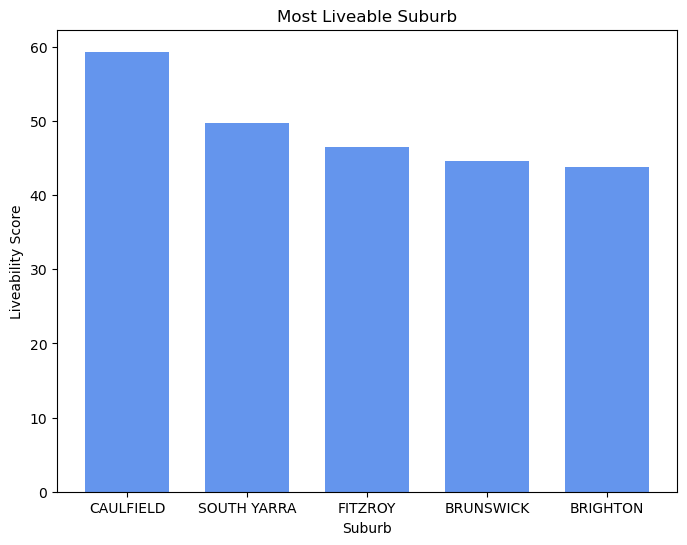

In [93]:
import matplotlib.pyplot as plt 

suburb = liveability['Suburb']
values = liveability['liveability_score']

plt.figure(figsize=(8, 6))

plt.bar(suburb, values, color = 'cornflowerblue', width = 0.7)
plt.xlabel('Suburb')
plt.ylabel('Liveability Score')
plt.title('Most Liveable Suburb')

plt.savefig('../plots/liveable_suburb.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

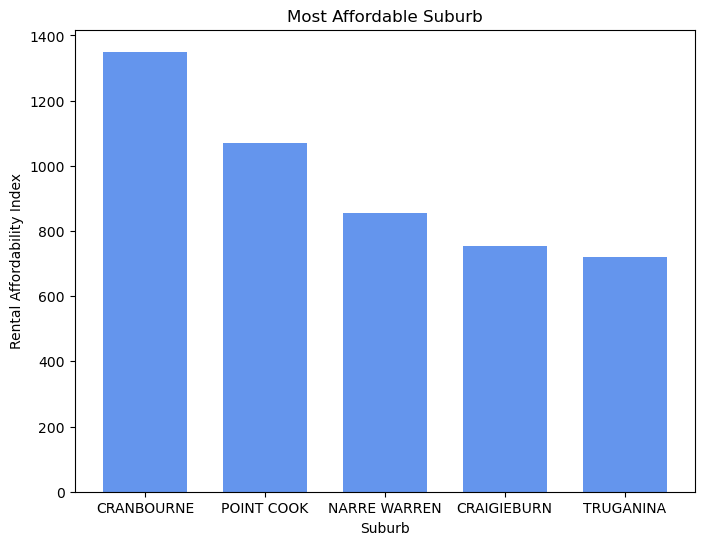

In [95]:
import matplotlib.pyplot as plt 

suburb = affordability['Suburb']
values = affordability['RAI']

plt.figure(figsize=(8, 6))

plt.bar(suburb, values, color = 'cornflowerblue', width = 0.7)
plt.xlabel('Suburb')
plt.ylabel('Rental Affordability Index')
plt.title('Most Affordable Suburb')

plt.savefig('../plots/affordable_suburb.png')
plt.show